<a href="https://colab.research.google.com/github/faisal9873/ML-Linear-Regression/blob/main/linearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Data

The Boston housing data set was collected in the 1970s to study the relationship between house
price and various factors such as the house size, crime rate, socio-economic status, etc. Since the
variables are easy to understand, the data set is ideal for learning basic concepts in machine
learning. The raw data and a complete description of the dataset can be found on the UCI website:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

First, We used the pd.read_csv command to read the data from the
file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list names of the column headers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
names =[
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
header=None,delim_whitespace=True,names=names,na_values='?')

In [3]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
shape = df.shape
print('\nnum samples :', shape[0])
print('\nnum attributes :', shape[1])


num samples : 506

num attributes : 14


In [5]:
y = np.array(df['PRICE'])

my = np.mean(y)
print('\nThe mean house price is ', my, 'thousands of dollars')
I = np.count_nonzero(y > my)
I1 = I/shape[0] * 100
print('\nOnly', I1, 'percent are above $40k')


The mean house price is  22.532806324110677 thousands of dollars

Only 41.30434782608695 percent are above $40k


# Visualizing the Data

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x = np.array(df['RM'])

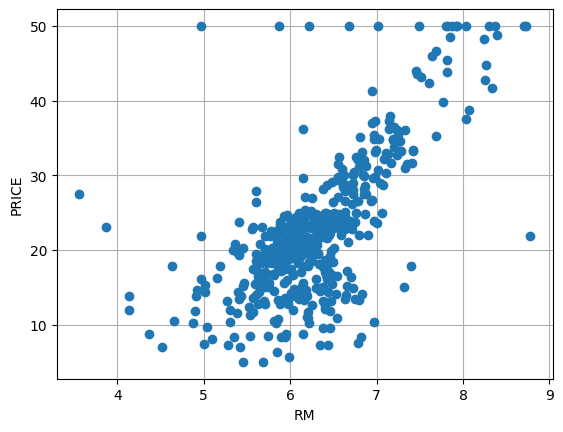

In [8]:
plt.plot(x,y,'o')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

#Fitting a Simple Linear Model
We will write a simple function to perform a linear fit. Use the formulae given in the class, to
compute the parameters in the linear model

y = β0 + β1x + ϵ

as well as the coefficient of determination R^{2}.

In [ ]:
xm = np.mean(x)
ym = np.mean(y)
syy = np.mean((y-ym)**2)
sxx = np.mean((x-xm)**2)
sxy = np.mean((y-ym)*(x-xm))

In [ ]:
sxy

4.48456555171929

In [ ]:
def fit_linear(x,y):
  """
  Given vectors of data points (x,y), performs a fit for the linear model:
  yhat = beta0 + beta1*x,
  The function returns beta0, beta1 and rsq, where rsq is the coefficient of determin
  """
  xm = np.mean(x)
  ym = np.mean(y)
  syy = np.mean((y-ym)**2)
  sxx = np.mean((x-xm)**2)
  sxy = np.mean((y-ym)*(x-xm))
  # TODO complete the following code
  # beta0 = ...
  beta1 = sxy/sxx
  beta0 = ym - beta1*xm
  yhat = beta0 + beta1*x
  ydev = np.sum((y-ym)**2)
  #ydev1 = syy*506
  yres = np.sum((y-yhat)**2)
  rsq = 1 - yres/ydev
  return beta0, beta1, rsq

In [ ]:
[beta0,beta1,rsq]=fit_linear(x,y)
fit_linear(x,y)

(-34.67062077643857, 9.10210898118031, 0.48352545599133423)

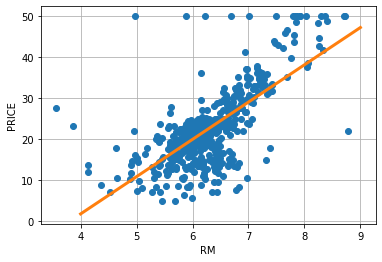

In [ ]:
xp = np.array([4,9])
yp = beta1*xp + beta0
plt.plot(x,y,'o') # Plot the data points
plt.plot(xp,yp,'-',linewidth=3) # Plot the regression line
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

#Computing coefficients of determination


In [ ]:
df1 = pd.DataFrame(columns = ['Name', 'Rsq'])
for i in range(13):
  x1 = np.array(df[names[i]])
  [Beta0, Beta1, rsq] = fit_linear(x1,y)
  df1 = df1.append({'Name' : names[i], 'Rsq' : format(rsq, ".3f")}, ignore_index = True)

In [ ]:
df1

##Fitting Simple Linear Regression with Sklearn

Here, we will be using the LinearRegression().fit(..., ...) function to fit a model to our data and measuring the performance afterwards using [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [55]:
x1 = x.reshape(-1, 1)
reg = LinearRegression().fit(x1, y)
ypred = reg.predict(x1)
ymean = np.mean(y)

In [33]:
reg.score(x1,y)

0.48352545599133423

In [66]:
rsq = 1 - (np.sum((y - ypred)**2)/np.sum((y - ymean)**2)) #calculation manually

0.48352545599133423